In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from tkinter import Tk     


# Data selection
choose which data are used in the experiment, english and thai one

In [2]:

# call the reference table
oldword = pd.read_excel("./image test/ref/wordlist_dict.xlsx")
newword = pd.read_excel("./image test/ref/newwordlist_dict.xlsx")
thref = pd.read_excel("./image test/ref/imgorderth_full.xlsx")
enref = pd.read_excel("./image test/ref/imgorderen_full.xlsx")


In [3]:
# add old and new word before hand
oldword['old-new'] = 'old'
newword['old-new'] = 'new'
wordmap_th = pd.concat([oldword, newword], ignore_index=True).set_index('imgid')[["th","old-new"]]
wordmap_th.rename(columns={"th":"word shown"}, inplace=True)
wordmap_en = pd.concat([oldword, newword], ignore_index=True).set_index('imgid')[["en","old-new"]]
wordmap_en.rename(columns={"en":"word shown"}, inplace=True)


# cleaning data
this but a simple row removal and column renaming for convenience

In [4]:
# claenadata
def III_cut_and_clean(prepdf):
    cutdf = prepdf.iloc[1:241][["lang","wordid","truestate","image.started","key_resp.started","key_resp.keys","key_resp.rt"]].reset_index(drop=True)
    cutdf = cutdf.rename({"image.started":"word_show","key_resp.started":"image_show","key_resp.keys":"key","key_resp.rt":"key_RT"}, axis="columns")
    return cutdf


# Define function that add that word is shown and whether if its an old or new image
add column `word shown` for easier datafram reading, `old-new` for a new and old word, and `len` for word length

In [5]:


# special, remove the word that user is not understandf before
def III_remove_excluded_words(df, exclude_words):
    # Ensure 'word shown' is a string column, and then strip and convert to lowercase
    df['word shown'] = df['word shown'].astype(str).str.strip().str.lower()

    # Convert the exclude_words list to lowercase for case-insensitivity
    # exclude_words = [word.lower() for word in exclude_words]

    # Filter out rows where 'word shown' contains any of the words in exclude_words
    df_filtered = df[~df['word shown'].isin(exclude_words)]
    
    print(f"Rows removed: {len(df) - len(df_filtered)}")  # Print how many rows were removed
    return df_filtered

In [6]:
# read the key and truestate file --> assign scoer --> plot total score in each correct and incorrect
def III_total_score(cutdf):
    cutdf.loc[(cutdf["truestate"] == 0) & (cutdf["key"] == 'z'),"score"] = 0
    cutdf.loc[(cutdf["truestate"] == 0) & (cutdf["key"] == 'x'),"score"] = 1
    cutdf.loc[(cutdf["truestate"] == 1) & (cutdf["key"] == 'z'),"score"] = 1
    cutdf.loc[(cutdf["truestate"] == 1) & (cutdf["key"] == 'x'),"score"] = 0

In [7]:

import glob
import os

path = './data/image test - data/'
all_files = glob.glob(os.path.join(path , "*.csv"))

normlist, normthlist, normenlist = [], [], []
exclude_words =  ["pear", "hose", "drill", "couch"]

for filename in all_files:
    user_lang_list = filename.split('_M')[0].split('- data\\')[1].split('_')
    username = user_lang_list[0]

    df = pd.read_csv(filename, index_col=None, header=0)
    dfi = III_cut_and_clean(df)
    III_total_score(dfi)

    #obtain word
    if dfi['lang'].mean() == 1:
        dfii = dfi.merge(wordmap_th, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        normthlist.append(dfii)

    if dfi['lang'].mean() == 2:
        dfii = dfi.merge(wordmap_en, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        dfii = III_remove_excluded_words(dfii, exclude_words)
        normenlist.append(dfii)
    # after obtained word

    normlist.append(dfii)

if len(normlist) == len(normenlist) + len(normthlist) and len(normenlist) == len(normthlist):
    n_subj = len(normenlist)
    print("validity = OK!")
else:
    print("caution,",len(normlist),"lists discrepancy compared to", len(normenlist),"and", len(normthlist) )

Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
validity = OK!


# create functional dataframe to use

In [8]:
# all
normall = pd.concat(normlist, ignore_index=True)
normth = pd.concat(normthlist, ignore_index=True)
normen = pd.concat(normenlist, ignore_index=True)

# Patient side

In [9]:
path = './data/patient image test/'
all_files = glob.glob(os.path.join(path , "*.csv"))
listth, listen, listall = [], [], []
exclude_words =  ["pear", "hose", "drill", "couch"]

for filename in all_files:
    user_lang_list = filename.split('_M')[0].split('patient image test\\')[1].split('_')
    username = user_lang_list[0]

    df = pd.read_csv(filename, index_col=None, header=0)
    dfi = III_cut_and_clean(df)
    III_total_score(dfi)

    #obtain word
    if dfi['lang'].mean() == 1:
        dfii = dfi.merge(wordmap_th, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        ptth = dfii

    if dfi['lang'].mean() == 2:
        dfii = dfi.merge(wordmap_en, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        dfii = III_remove_excluded_words(dfii, exclude_words)
        pten = dfii
    # after obtained word

    listall.append(dfii)

Rows removed: 16


In [10]:
ptall = pd.concat(listall, ignore_index=True)

# Coloring variable

In [11]:
redgradient = ["#ffa5bb","#ff9eb6", "#ff7d9d", "#ff6087","#ff0040" ] # thai language, use the last index value as the main color
bluegradient = ["#c0d7ff", "#92bcff", "#5e9eff","#3686ff","#0067ff" ] # english language, use the last index value as the main color
gaygradient = ["#949494", '#727272', '#4b4b4b', '#484848', '#373737'] # overall gradient
colincorrect = '#ff6962'
colcorrect  = '#77dd76'
patient = '#fc6600'
normcolor = '#2b7cd3'

# _plotting are beyond this line_
---

In [12]:
def legend_unique(prop = None):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Removes duplicates
    plt.legend(unique_labels.values(), unique_labels.keys(), prop = prop)

# plot accuracy response for each word length
self explanatory, plot correct and wrong accuracy from `score` by the column `len`

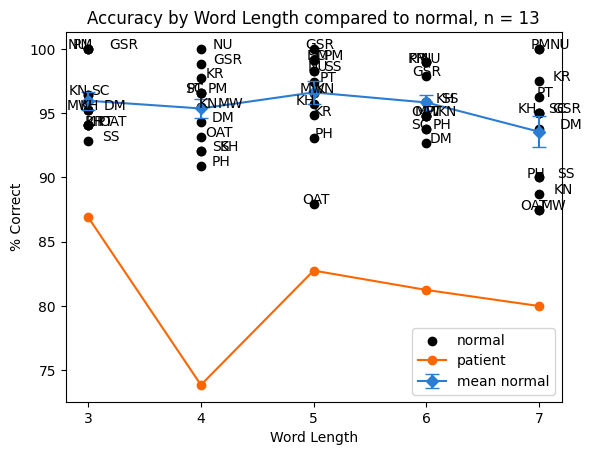

In [16]:
# Word length vs % correct
import random

# all data by user
norm_df = normall.groupby(['username', 'word_length'])['score'].mean().mul(100).unstack()
for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, label = 'normal', color = 'black', marker = 'o')
    for len, val in accubylen.items():
        plt.text(len + random.uniform(-0.2,0.2), val, user)
e = []
for i in norm_df.columns:
    e.append(norm_df[i].sem())

# mean of all user
mean_df = normall.groupby('word_length')['score'].mean() * 100
sem_df = normall.groupby('word_length')['score'].sem() *100

x = mean_df.index
y = mean_df.values

plt.errorbar(x, y, yerr = e, color = normcolor, marker =  'D', capsize = 5, label = 'mean normal')

# for i in range(len(x)):
#     plt.text(x[i], y[i]+1, round(y[i], 2), ha = 'center')

# patient
patientmean_df = ptall.groupby('word_length')['score'].mean().mul(100)

plt.plot(patientmean_df.index, patientmean_df.values, marker = 'o',color = patient, label = 'patient')


# Labels and title
plt.ylabel("% Correct")
plt.xlabel("Word Length")
plt.title(f"Accuracy by Word Length compared to normal, n = {n_subj}")


plt.xticks(x)
legend_unique()
# plt.savefig("./figure/norm/III norm accu by wordlen.png")


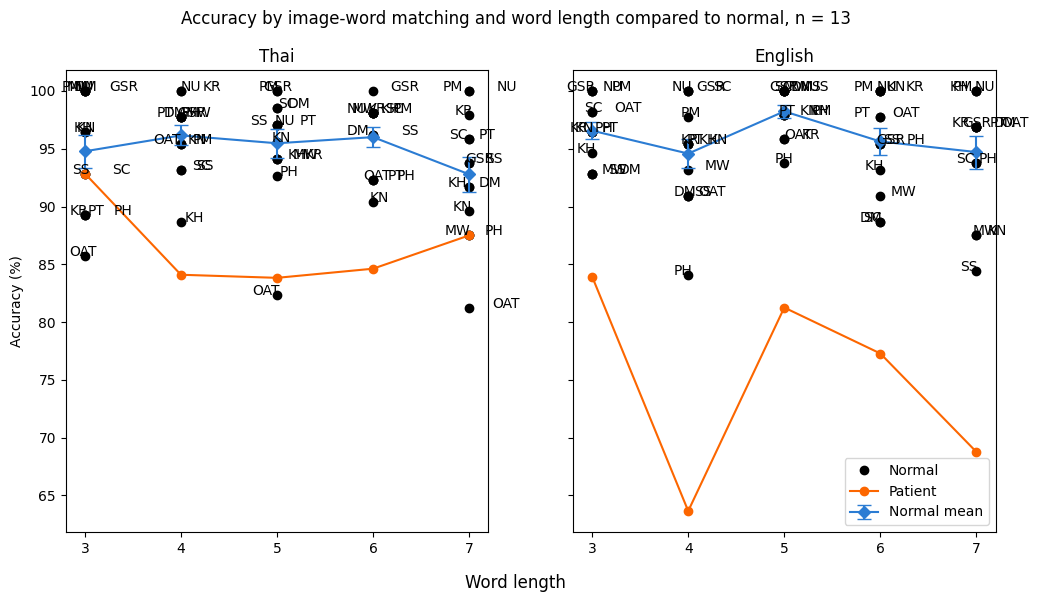

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten]]
for i in [0,1]:

    d = lister[i][0].groupby(['word_length', 'username'])['score'].mean().mul(100).unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

        for vi, vv in v.items():
            axs[i].text(vi + random.uniform(-0.3,0.3), vv, s )
    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['word_length'])['score'].mean().mul(100)
    s = lister[i][1].groupby(['word_length'])['score'].sem().mul(100)
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by image-word matching and word length compared to normal, n = {n_subj}")
fig.supxlabel("Word length")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([3,4,5,6,7])
axs[1].set_xticks([3,4,5,6,7])
legend_unique()
# plt.savefig("./figure/norm/III norm accu by wordlen and language.png")


# plot image and word accuracy
plot both accuracy of the task order that word shown match the image and word shown is not matched with the image

username          DM        GSR         KH         KN         KR         MW  \
truestate                                                                     
0.0        94.396552  97.844828  92.241379  93.534483  95.258621  92.672414   
1.0        96.120690  99.137931  97.413793  95.689655  97.844828  95.689655   

username           NU        OAT         PH         PM         PT         SC  \
truestate                                                                      
0.0        100.000000  88.362069  92.672414  98.706897  94.827586  96.551724   
1.0         98.706897  94.396552  92.241379  99.137931  96.982759  96.120690   

username          SS  
truestate             
0.0        95.258621  
1.0        93.103448  


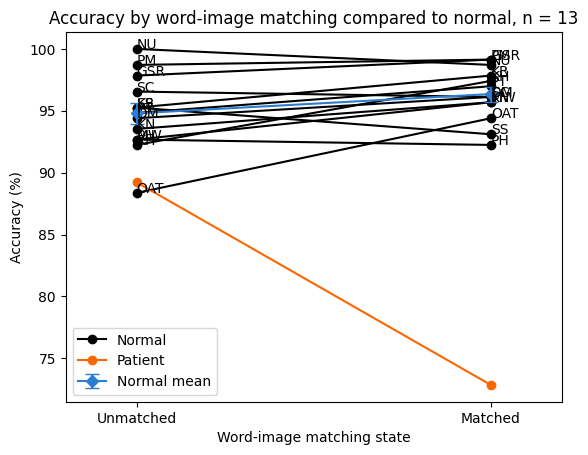

In [19]:
d = normall.groupby(['truestate', 'username'])['score'].mean().mul(100).unstack()

print(d)
for i, v in d.items():
    plt.plot(v.index, v.values, color = 'black', marker = 'o', label = 'Normal')
    for vi, vv in v.items():
        plt.text(vi, vv, i)
mean, sem = d.T.mean(), d.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')

p = ptall.groupby(['truestate'])['score'].mean().mul(100)
plt.plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

legend_unique()

plt.title(f"Accuracy by word-image matching compared to normal, n = {n_subj}")
plt.ylabel("Accuracy (%)")
plt.xlabel("Word-image matching state")
plt.xticks(d.index, ['Unmatched','Matched'])
plt.margins(x=0.2)

# plt.savefig("./figure/norm/III norm accu by truestate.png")


#  grouped bar chart with the correct and incorrect image accuracy, both language

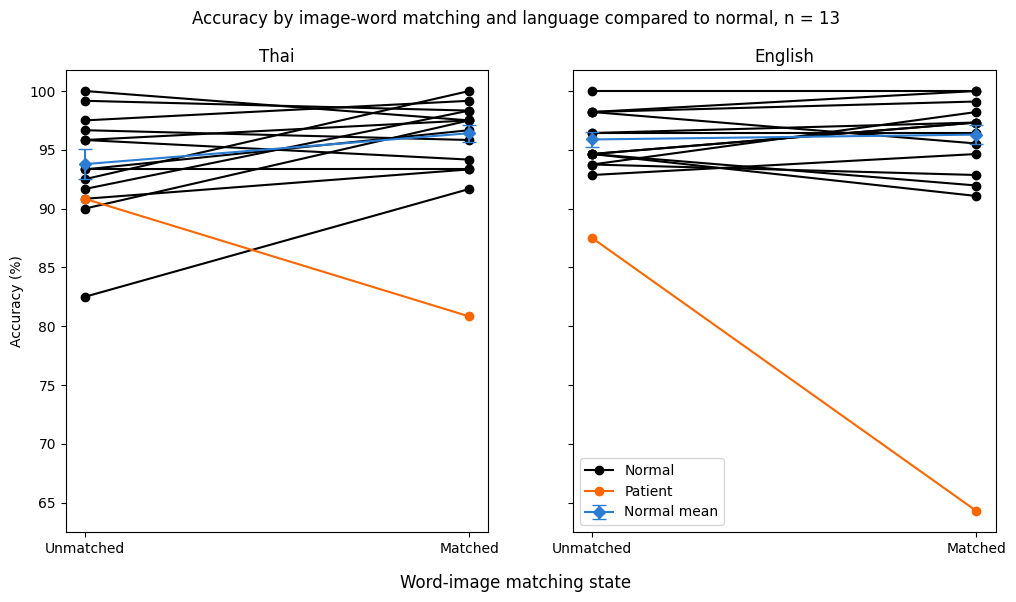

In [37]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten]]
for i in [0,1]:

    d = lister[i][0].groupby(['truestate', 'username'])['score'].mean().mul(100).unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['truestate'])['score'].mean().mul(100)
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by image-word matching and language compared to normal, n = {n_subj}")
fig.supxlabel("Word-image matching state")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([0,1], ['Unmatched','Matched'])
axs[1].set_xticks([0,1], ['Unmatched','Matched'])
legend_unique()

plt.savefig("./figure/norm/III norm accu by truestate and language.png")


# Reaction time part
---

In [38]:
# filtering
normall_filter = normall[normall['score'] == 1]
normth_filter = normth[normth['score'] == 1]
normen_filter = normen[normen['score'] == 1]
ptall_filter = ptall[ptall['score'] == 1]
ptth_filter = ptth[ptth['score'] == 1]
pten_filter = pten[pten['score'] == 1]

## Overall reaction time in both histogram and boxplot

# Reaction time by word image match state
plot a bar chart between reaction time (s) mean by the truestate of the task

username         DM       GSR        KH        KN        KR        MW  \
truestate                                                               
0.0        0.789907  0.692491  1.226232  0.461547  0.636470  0.835602   
1.0        0.716291  0.583815  1.043207  0.411613  0.528964  0.756286   

username         NU       OAT        PH        PM        PT        SC  \
truestate                                                               
0.0        1.212334  0.595972  1.259358  0.602999  0.829880  1.223246   
1.0        1.123129  0.549302  1.163453  0.523968  0.641601  0.868893   

username         SS  
truestate            
0.0        0.886117  
1.0        0.627088  


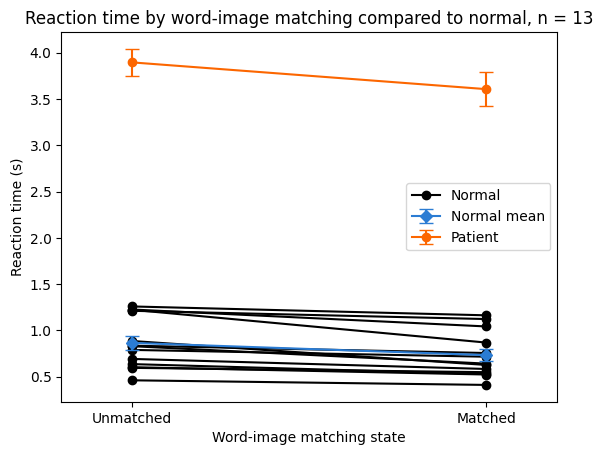

In [39]:
d = normall_filter.groupby(['truestate', 'username'])['key_RT'].mean().unstack()

print(d)
for i, v in d.items():
    plt.plot(v.index, v.values, color = 'black', marker = 'o', label = 'Normal')
mean, sem = d.T.mean(), d.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')

p = ptall_filter.groupby(['truestate'])['key_RT'].mean()
s = ptall_filter.groupby(['truestate'])['key_RT'].sem()
plt.errorbar(p.index, p.values, yerr = s.values, color = patient, capsize = 5, marker = 'o', label = "Patient")

legend_unique()

plt.title(f"Reaction time by word-image matching compared to normal, n = {n_subj}")
plt.ylabel("Reaction time (s)")
plt.xlabel("Word-image matching state")
plt.xticks(d.index, ['Unmatched','Matched'])
plt.margins(x=0.2)
plt.savefig("./figure/norm/III norm RT by truestate.png")



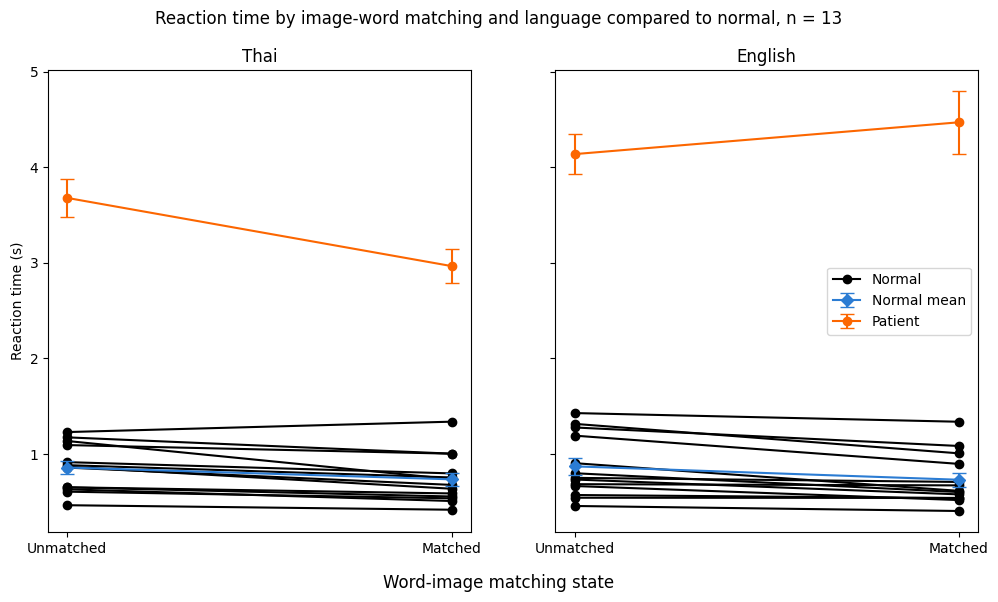

In [40]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth_filter, ptth_filter] , [normen_filter, pten_filter]]
for i in [0,1]:

    d = lister[i][0].groupby(['truestate', 'username'])['key_RT'].mean().unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['truestate'])['key_RT'].mean()
    s = lister[i][1].groupby(['truestate'])['key_RT'].sem()
    axs[i].errorbar(p.index, p.values, yerr = s.values, capsize = 5, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Reaction time by image-word matching and language compared to normal, n = {n_subj}")
fig.supxlabel("Word-image matching state")
axs[0].set_ylabel("Reaction time (s)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([0,1], ['Unmatched','Matched'])
axs[1].set_xticks([0,1], ['Unmatched','Matched'])
legend_unique()

plt.savefig("./figure/norm/III norm RT by truestate and language.png")


# Reaction time byword length
plot a bar chart between reaction time (s) mean by the word length

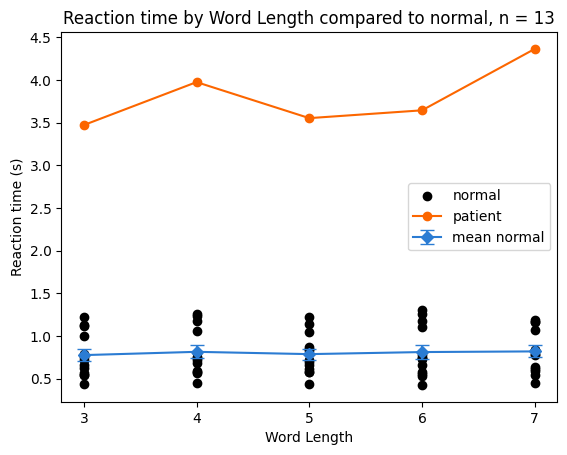

In [41]:
# Word length vs % correct

# all data by user
norm_df = normall_filter.groupby(['username', 'word_length'])['key_RT'].mean().unstack()
for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, label = 'normal', color = 'black', marker = 'o')

e = []
for i in norm_df.columns:
    e.append(norm_df[i].sem())

# mean of all user
mean_df = normall_filter.groupby('word_length')['key_RT'].mean()
sem_df = normall_filter.groupby('word_length')['key_RT'].sem()

x = mean_df.index
y = mean_df.values

plt.errorbar(x, y, yerr = e, color = normcolor, marker =  'D', capsize = 5, label = 'mean normal')

# for i in range(len(x)):
#     plt.text(x[i], y[i]+1, round(y[i], 2), ha = 'center')

# patient
patientmean_df = ptall_filter.groupby('word_length')['key_RT'].mean()

plt.plot(patientmean_df.index, patientmean_df.values, marker = 'o',color = patient, label = 'patient')


# Labels and title
plt.ylabel("Reaction time (s)")
plt.xlabel("Word Length")
plt.title(f"Reaction time by Word Length compared to normal, n = {n_subj}")

plt.xticks(x)
legend_unique()

plt.savefig("./figure/norm/III norm RT by wordlen.png")


# Reaction time by word length, both language
plot a bar chart between reaction time (s) mean by the truestate of the task

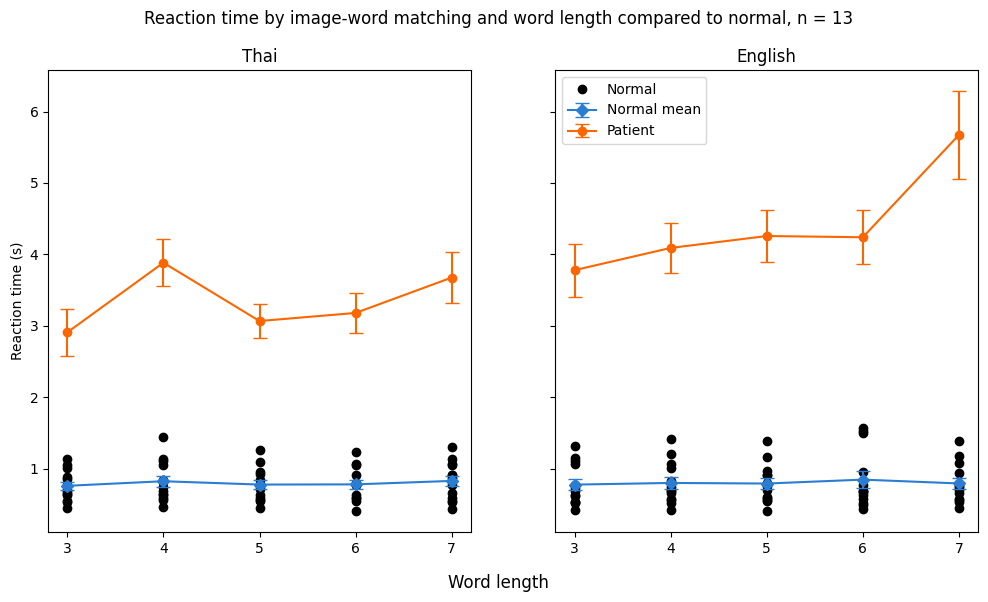

In [42]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth_filter, ptth_filter] , [normen_filter, pten_filter]]
for i in [0,1]:

    d = lister[i][0].groupby(['word_length', 'username'])['key_RT'].mean().unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['word_length'])['key_RT'].mean()
    s = lister[i][1].groupby(['word_length'])['key_RT'].sem()
    axs[i].errorbar(p.index, p.values, yerr = s.values, capsize = 5, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Reaction time by image-word matching and word length compared to normal, n = {n_subj}")
fig.supxlabel("Word length")
axs[0].set_ylabel("Reaction time (s)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([3,4,5,6,7])
axs[1].set_xticks([3,4,5,6,7])
legend_unique()

plt.savefig("./figure/norm/III norm RT by wordlen and language.png")
